In [1]:
import matplotlib.pyplot as plt; plt.style.use('seaborn')
import numpy as np; np.random.seed(0)
import pandas as pd
from scipy import stats

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv'
df = pd.read_csv(url, usecols=[1,2,3,4])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
#df.info()

$$
f(x^{(i)})=\beta_0+\sum_{j=1}^p\beta_jx_j^{(i)}
$$
$$
$$
$$
{\bf X}=\left[\begin{array}{cccccc}
1&x^{(1)}_1&x^{(1)}_2&\cdots&x^{(1)}_p\\
1&x^{(2)}_1&x^{(2)}_2&\cdots&x^{(2)}_p\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&x^{(N)}_1&x^{(N)}_2&\cdots&x^{(N)}_p\\
\end{array}\right]
$$
$$
$$
$$
\hat\beta=({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}
$$
$$
$$
$$
\hat{\bf y}={\bf X}\hat\beta={\bf X}({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}
$$
$$
$$
$$
\hat\beta=({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}\sim N(\beta,({\bf X}^T{\bf X})^{-1}\sigma^2)
$$
$$
$$
$$
\hat\sigma^2=\frac{1}{N-p-1}\sum_{i=1}^N(y^{(i)}-\hat y^{(i)})^2\sim \sigma^2\frac{\chi^2_{N-p-1}}{N-p-1}
$$
$$
$$
Under $H_0:\beta_j=0$
$$
t_j=\frac{\hat\beta_j}{\hat\sigma\sqrt{v_j}}\sim t_{N-p-1}
$$
where
$$
v_j=({\bf X}^T{\bf X})^{-1}_{jj}
$$

In [4]:
import statsmodels.formula.api as sm # conda install -c conda-forge statsmodels
result = sm.ols('Sales ~ TV + Radio + Newspaper', df).fit()
print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011


In [5]:
import statsmodels.formula.api as sm # conda install -c conda-forge statsmodels
result = sm.ols('Sales ~ TV + Radio + TV:Radio', df).fit()
print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001


In [6]:
def train_test_split(df, test_size_ratio=0.3):
    num_data = df.shape[0]
    num_data_train = int(num_data * (1-test_size_ratio)) 
    xy_train = df.iloc[:num_data_train].values
    xy_test = df.iloc[num_data_train:].values
    x_train = xy_train[:,:-1].astype(np.float32)
    y_train = xy_train[:,-1].astype(np.float32).reshape((-1,1))
    x_test = xy_test[:,:-1].astype(np.float32)
    y_test = xy_test[:,-1].astype(np.float32).reshape((-1,1))
    return x_train, y_train, x_test, y_test

In [7]:
x_train, y_train, x_test, y_test = train_test_split(df[['TV','Radio','Sales']]) 
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype)

(140, 2) (140, 1) (60, 2) (60, 1)
float32 float32 float32 float32


In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

In [9]:
print(model.intercept_)
print(model.coef_)

[2.9880857]
[[0.04705828 0.1779912 ]]


In [10]:
print(model.score(x_train, y_train)) # R^2
print(model.score(x_test, y_test)) # R^2

0.8935667474563879
0.9014412858316888


$$
\begin{array}{lll}
\mbox{MAE}&&\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|\\
\mbox{MSE}&&\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2\\
\mbox{RMSE}&&\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}
\end{array}
$$

In [11]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_test_pred))
print(metrics.mean_squared_error(y_test, y_test_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

1.2429519
2.5484755
1.5963945


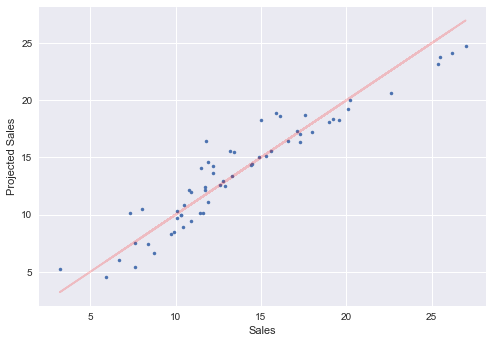

In [12]:
plt.plot(y_test.reshape((-1,)), y_test_pred.reshape((-1,)), '.')
plt.plot(y_test.reshape((-1,)), y_test.reshape((-1,)), '-r', alpha=0.2)
plt.xlabel('Sales')
plt.ylabel('Projected Sales');

# Reference

[Data_School](https://www.youtube.com/watch?v=3ZWuPVWq7p4&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=6)

[JWarmenhoven](https://github.com/JWarmenhoven/ISLR-python)